In [1]:
import hmmlearn
import numpy as np
from hmmlearn import hmm
import hsmmlearn

In [2]:
np.tile(np.identity(2), (3, 1, 1)).shape

(3, 2, 2)

In [11]:
np.random.seed(42)

model = hmm.MultinomialHMM(n_components=8, n_trials=10)
model.startprob_ = np.array([1, 0, 0, 0, 0, 0 ,0, 0])
model.emissionprob_ = np.ones((8, 8))
model.transmat_ = np.array([[0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.3, 0. , 0. , 0. , 0.5],
       [0. , 0. , 0.2, 0. , 0.7, 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])
# model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], ])
# model.covars_ = np.tile(np.identity(2), (8, 1, 1))
X, Z = model.sample(1000)

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


ValueError: pvals < 0, pvals > 1 or pvals contains NaNs

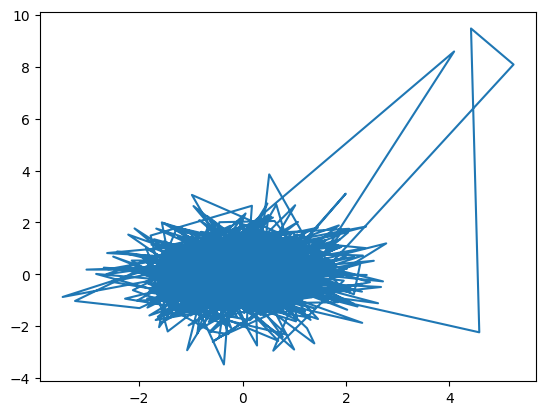

In [74]:
import matplotlib.pyplot as plt
plt.plot(X[:,0], X[:,1])

In [58]:
len(model.covars_)

8

In [32]:
X

array([[-1.11188012,  0.31890218],
       [ 1.57921282,  0.76743473],
       [-0.58087813, -0.52516981],
       ...,
       [ 1.79679914, -4.04204441],
       [-0.38152414, -0.58014365],
       [-0.45612083,  0.18142662]], shape=(1000, 2))

In [30]:
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
remodel.fit(X)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

In [31]:
remodel.transmat_

array([[0.70510111, 0.1058512 , 0.18904769],
       [0.24728613, 0.41968912, 0.33302476],
       [0.28376708, 0.1871362 , 0.52909672]])

In [19]:
import numpy as np
from hmmlearn import hmm

# For this example, we will model the stages of a conversation,
# where each sentence is "generated" with an underlying topic, "cat" or "dog"
states = ["cat", "dog"]
id2topic = dict(zip(range(len(states)), states))
# we are more likely to talk about cats first
start_probs = np.array([0.6, 0.4])

# For each topic, the probability of saying certain words can be modeled by
# a distribution over vocabulary associated with the categories

vocabulary = ["tail", "fetch", "mouse", "food"]
# if the topic is "cat", we are more likely to talk about "mouse"
# if the topic is "dog", we are more likely to talk about "fetch"
emission_probs = np.array([[0.25, 0.1, 0.4, 0.25],
                           [0.2, 0.5, 0.1, 0.2]])

# Also assume it's more likely to stay in a state than transition to the other
trans_mat = np.array([[0.8, 0.2], [0.2, 0.8]])


# Pretend that every sentence we speak only has a total of 5 words,
# i.e. we independently utter a word from the vocabulary 5 times per sentence
# we observe the following bag of words (BoW) for 8 sentences:
observations = [["tail", "mouse", "mouse", "food", "mouse"],
        ["food", "mouse", "mouse", "food", "mouse"],
        ["tail", "mouse", "mouse", "tail", "mouse"],
        ["food", "mouse", "food", "food", "tail"],
        ["tail", "fetch", "mouse", "food", "tail"],
        ["tail", "fetch", "fetch", "food", "fetch"],
        ["fetch", "fetch", "fetch", "food", "tail"],
        ["food", "mouse", "food", "food", "tail"],
        ["tail", "mouse", "mouse", "tail", "mouse"],
        ["fetch", "fetch", "fetch", "fetch", "fetch"]]

# Convert "sentences" to numbers:
vocab2id = dict(zip(vocabulary, range(len(vocabulary))))
def sentence2counts(sentence):
    ans = []
    for word, idx in vocab2id.items():
        count = sentence.count(word)
        ans.append(count)
    return ans

X = []
for sentence in observations:
    row = sentence2counts(sentence)
    X.append(row)

data = np.array(X, dtype=int)

# pretend this is repeated, so we have more data to learn from:
lengths = [len(X)]*5
sequences = np.tile(data, (5,1))


# Set up model:
model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50,
        init_params='')

model.n_features = len(vocabulary)
model.startprob_ = start_probs
model.transmat_ = trans_mat
model.emissionprob_ = emission_probs
model.fit(sequences, lengths)
logprob, received = model.decode(sequences)

print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(np.round(model.emissionprob_, 2))

print("Learned transition matrix:")
print(np.round(model.transmat_, 2))

# Try to reset and refit:
new_model = hmm.MultinomialHMM(n_components=len(states),
        n_trials=len(observations[0]),
        n_iter=50, init_params='ste')

new_model.fit(sequences, lengths)
logprob, received = new_model.decode(sequences)

print("\nNew Model")
print("Topics discussed:")
print([id2topic[x] for x in received])

print("Learned emission probs:")
print(np.round(new_model.emissionprob_, 2))

print("Learned transition matrix:")
print(np.round(new_model.transmat_, 2))

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Topics discussed:
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog']
Learned emission probs:
[[0.26 0.03 0.43 0.29]
 [0.13 0.73 0.   0.13]]
Learned transition matrix:
[[0.71 0.29]
 [0.5  0.5 ]]

New Model
Topics discussed:
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog']
Learned emission probs:
[[0.26 0.03 0.43 0.29]
 [0.13 0.73 0.   0.13]]
Learned transition matrix:
[[0.71 0.29]
 [0.5  0.5 ]]


In [ ]:
emission_probs = np.array([[0.25, 0.1, 0.4, 0.25],
                           [0.2, 0.5, 0.1, 0.2]])

# Also assume it's more likely to stay in a state than transition to the other
trans_mat = np.array([[0.8, 0.2], [0.2, 0.8]])

